In [11]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mtlb
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


## Dataset description

- Description des données

 **Index**

- **DELIVERY_START** : date et heure de livraison de l'électricité

**Variables explicatives**

- **load_forecast** : prévision de consommation totale d'éléctricité en France
- **coal_power_available, gas_power_available, nucelear_power_available** : capacité de production totale d'électricité des centrales à charbon, gaz et nucléaire respectivement,
- **wind_power_forecasts_average, solar_power_forecasts_average** : moyenne de différentes prévisions de production totale d'électricité éolienne et solaire (respectivement),
- **wind_power_forecasts_std, solar_power_forecasts_std** : écart-type de ces mêmes prévisions,
- **predicted_spot_price** : prévision du prix SPOT de l'électricité issues d'un modèle interne de Elmy. Ce modèle est lancé chaque jour avant la fermeture des enchères SPOT pour le lendemain.

**Variable cible**

- **spot_id_delta** : l'écart entre le VWAP des transactions sur le marché infra-journalier (Intraday) et le prix SPOT pour 1MWh d'électricité (spot_id_delta = Intraday - SPOT) : si la valeur est positive, le prix Intraday est supérieur au prix SPOT et inversement

### Reading Dataset

In [12]:
X_train = pd.read_csv("X_train_Wwou3IE.csv")
y_train = pd.read_csv("y_train_jJtXgMX.csv")
df = pd.concat([X_train, y_train["spot_id_delta"]], axis=1).rename(columns={"nucelear_power_available":"nuclear_power_available"})


#### Dataset overview

In [13]:
df

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN,-36.874770
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN,-12.643588
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN,-1.950193
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN,1.938272
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN,0.199907
...,...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11,6.029303
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66,13.576177
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01,17.478945
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74,17.559407


In [14]:
df.shape

(10605, 11)

**Insight**:

The Dataframe has 10605 rows and 11 columns (with one which is the interest variable)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DELIVERY_START                 10605 non-null  object 
 1   load_forecast                  9318 non-null   float64
 2   coal_power_available           10604 non-null  float64
 3   gas_power_available            10604 non-null  float64
 4   nuclear_power_available        10604 non-null  float64
 5   wind_power_forecasts_average   10581 non-null  float64
 6   solar_power_forecasts_average  10581 non-null  float64
 7   wind_power_forecasts_std       10581 non-null  float64
 8   solar_power_forecasts_std      10581 non-null  float64
 9   predicted_spot_price           1846 non-null   float64
 10  spot_id_delta                  10605 non-null  float64
dtypes: float64(10), object(1)
memory usage: 911.5+ KB


**Insight**:

- Most of the variables are Float 
- Delivery start variable is String type and will not be useful for the regression/classification task

In [16]:
# Displays some raws of the dataframe
print("\nSample of the dataset:")
df.sample(10)


Sample of the dataset:


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
4699,2022-07-22 21:00:00+02:00,NaN,2226.0,11525.0,27380.0,2387.0,131.0,122.271189,4.987842,NaN,-80.165782
10344,2023-03-19 02:00:00+01:00,44401.0,3386.0,11480.0,38145.0,2488.0,0.0,81.953937,0.000000,NaN,2.253664
9521,2023-02-11 19:00:00+01:00,63877.0,3386.0,11945.0,44480.0,1789.0,0.0,70.509686,0.000000,174.42,-3.289215
409,2022-01-18 03:00:00+01:00,65285.0,3386.0,11487.0,48911.0,2397.0,0.0,31.578101,0.000000,NaN,-0.742444
4606,2022-07-19 00:00:00+02:00,NaN,2226.0,11140.0,24580.0,5846.0,0.0,65.474038,0.000000,NaN,-8.960679
7365,2022-11-13 23:00:00+01:00,47513.0,2806.0,11945.0,32015.0,3546.0,0.0,121.983901,0.000000,NaN,2.032720
1757,2022-03-16 22:00:00+01:00,52361.0,2806.0,11952.0,36810.0,4220.0,0.0,255.468336,0.000000,NaN,-12.095225
5392,2022-08-20 18:00:00+02:00,NaN,2226.0,11060.0,24867.0,1538.0,3427.0,45.869060,55.918045,NaN,36.780383
8788,2023-01-12 06:00:00+01:00,56453.0,3386.0,11945.0,46265.0,14579.0,0.0,28.516536,0.000000,90.23,-8.079105
793,2022-02-03 03:00:00+01:00,56185.0,2806.0,11487.0,50122.0,2419.0,0.0,40.780939,0.000000,NaN,-9.062334


**Insight**:

Some Nan values must be further processed


In [17]:
#Display the dataset of raws of df with at least one Nan value
df[df.isnull().any(axis=1)]

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN,-36.874770
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN,-12.643588
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN,-1.950193
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN,1.938272
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN,0.199907
...,...,...,...,...,...,...,...,...,...,...,...
10554,2023-03-27 21:00:00+02:00,52863.0,3386.0,11952.0,36990.0,1837.0,0.0,136.999062,0.0,NaN,1.540616
10555,2023-03-27 22:00:00+02:00,52783.0,3386.0,11952.0,36990.0,1812.0,0.0,128.421281,0.0,NaN,-1.485172
10556,2023-03-27 23:00:00+02:00,53274.0,3386.0,11952.0,36990.0,1854.0,0.0,106.112440,0.0,NaN,-6.687949
10557,2023-03-28 00:00:00+02:00,50798.0,3386.0,11952.0,36990.0,2050.0,0.0,76.348188,0.0,NaN,7.277778


**Insight**:

- The dataset is of very low quality with near to 80% of its rows filled with Nan values.
- It could be interesting to see how much are there for each column

In [18]:
def count_nan_by_column(dataframe):
    "Displays the number of Nan values for each column"

    for column in df.columns:
        col_value = dataframe[column]
        number_of_nan = col_value.isnull().sum()
        print(f"Number of Nan values for '{column}' column: {number_of_nan}")

    return 0

print("Here the number of Nan values for each column:")
print("______________________________________________")
count_nan_by_column(df)
    

Here the number of Nan values for each column:
______________________________________________
Number of Nan values for 'DELIVERY_START' column: 0
Number of Nan values for 'load_forecast' column: 1287
Number of Nan values for 'coal_power_available' column: 1
Number of Nan values for 'gas_power_available' column: 1
Number of Nan values for 'nuclear_power_available' column: 1
Number of Nan values for 'wind_power_forecasts_average' column: 24
Number of Nan values for 'solar_power_forecasts_average' column: 24
Number of Nan values for 'wind_power_forecasts_std' column: 24
Number of Nan values for 'solar_power_forecasts_std' column: 24
Number of Nan values for 'predicted_spot_price' column: 8759
Number of Nan values for 'spot_id_delta' column: 0


0

**Insight**:

- Most of the Nan values are in the "load_forecast" column with 1287 Nan values and in "predicted_spot_price" column with 8759 Nan values.
- Since there are only 8783 rows with Nan values, there at leasrt roughly 1000 rough with 2 Nan values
- These two columns must be analysed and processed properly

In [19]:
# Summarized Statistical description of the dataset
print("\nStatistical description:")
df.describe()




Statistical description:


,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta
count,9318.000000,10604.000000,10604.000000,10604.000000,10581.000000,10581.000000,10581.000000,10581.000000,1846.000000,10605.000000
mean,53725.132968,2819.781592,11463.220671,35393.282252,4512.989415,1919.281353,125.399422,24.997384,140.256024,0.943358
std,11274.194929,495.103588,483.799154,7619.820162,3349.419356,2706.963383,132.152875,43.083977,33.922669,38.093819
min,30515.000000,1646.000000,9769.000000,22285.000000,592.000000,0.000000,1.830211,0.000000,42.420000,-1567.353547
25%,45336.500000,2226.000000,11140.000000,29005.000000,2036.000000,0.000000,46.818974,0.000000,119.405000,-11.934152
50%,51846.000000,2806.000000,11487.000000,32470.000000,3319.000000,149.000000,86.700163,3.507229,140.040000,0.059125
75%,62091.750000,3386.000000,11945.000000,43055.000000,5951.000000,3507.000000,155.325644,35.137019,160.765000,12.190489
max,85145.000000,3391.000000,11963.000000,50122.000000,15167.000000,10127.000000,1871.571992,745.261316,254.190000,658.961329


**Insight**

**load_forecast**: 
- Seems to be normally distributed
- High level std

**coal_power_available**: 
- Min and max value seem to be too far from the mean

**gas_power_available**: 
- Same thing

**nuclear_power_available**: 
- Same thing 
- High level std 

**wind_power_forecasts_average**: 
- The third quartile seems to be too far from th mean value compared to the std of the variable
- Max value very (very) high

**solar_power_forecasts_average**:
- At least 25 % of the data's equal to 0 
- Very high difference between the third quartile and the median
- Max value very far from the mean. This ca be explained by the fact that sunshine is'nt present everyday

**wind_power_forecasts_std**:
- Very high difference between the third quartile and the max value
- The distribution seems to be right skewed

**solar_power_forecasts_std**:
- Same thing

**predicted_spot_price**:
- Seems to be normally distributed

**spot_id_delta**:
- Seems to be normally distributed with mean near to 0
- The mean is equal to 0 beacause of the existence of negative values







In [21]:
# Check for duplicated rows
print("\nCheck for duplicated rows:")
df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())


Check for duplicated rows:


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nuclear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,spot_id_delta


**Insight**:

- No duplicated rows


Histograms for all numrical features:


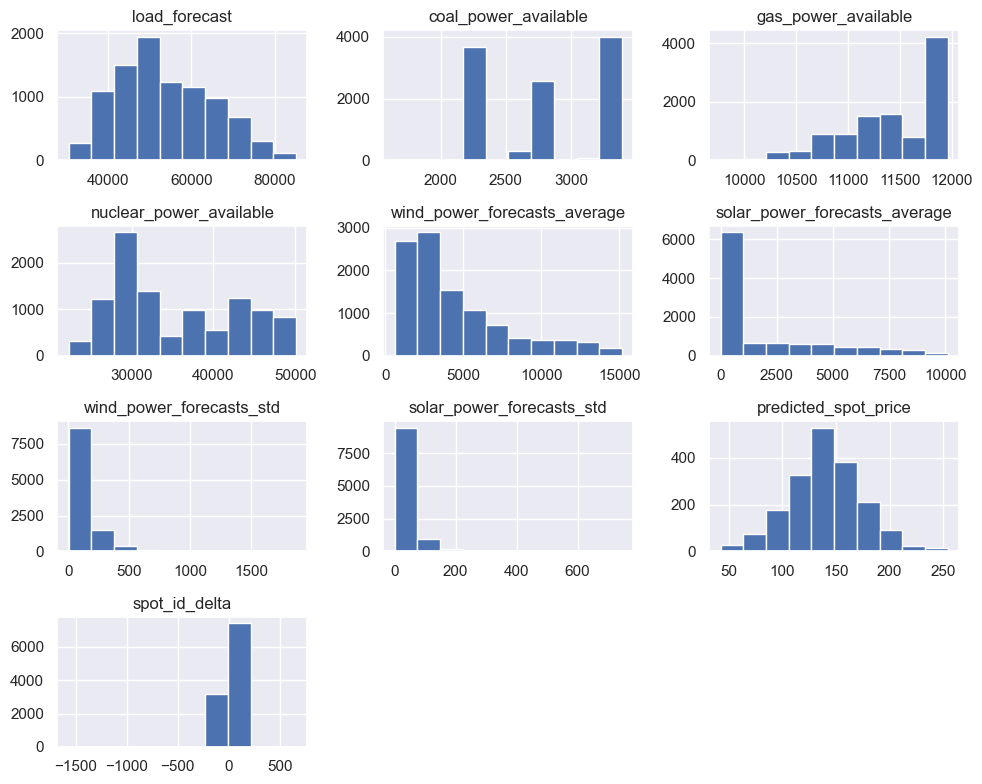

In [27]:
# Histograms for all numrical features
print("\nHistograms for all numrical features:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

ValueError: too many values to unpack (expected 2)

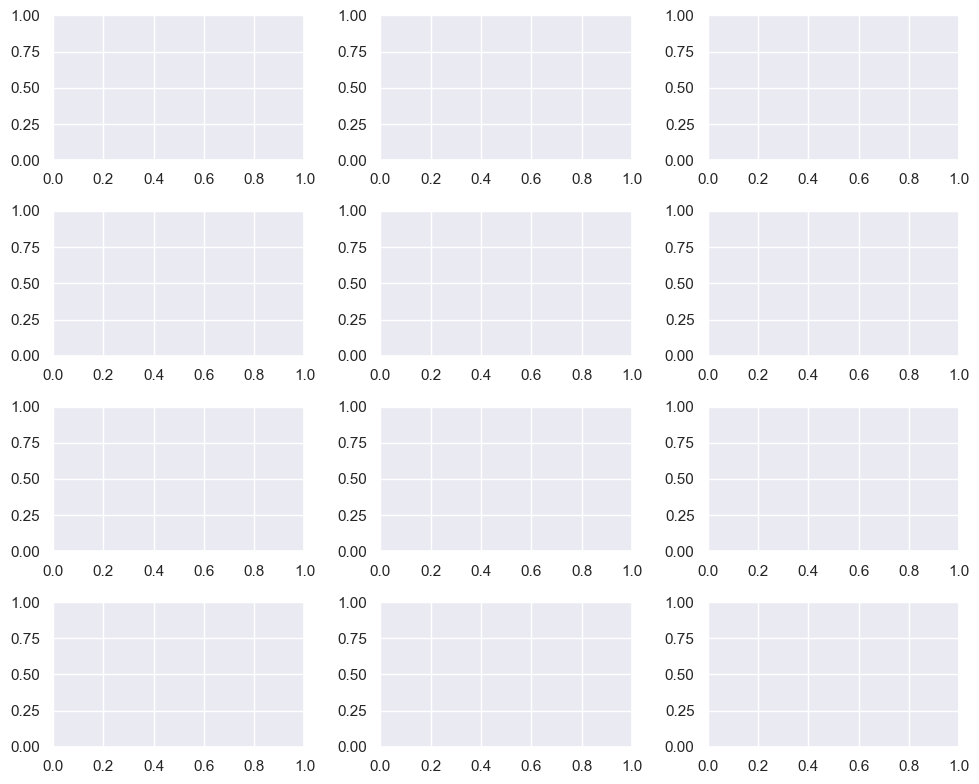

In [36]:
# Boxplots to check for outliers
numeric_cols = ["load_forecast", "coal_power_available", "gas_power_available", 
                "nuclear_power_available", "wind_power_forecasts_average", 
                "solar_power_forecasts_average", "wind_power_forecasts_std",
                "solr_power_forecats_std", "predicted_spot_price", "spot_id_delta"]

# Defines the number of rows and columns of the future subplot
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Defines the figure
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))
fig.tight_layout()

for index, col in numeric_cols:
    row_plot = index // n_rows
    col_plot = index % n_cols
    sns.boxplot(x=df[col], ax=axs[row_plot, col_plot])

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

    
